In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

reports_flenames = os.listdir("./reports/")
reports_flenames = [filename for filename in reports_flenames if filename!='.ipynb_checkpoints']
reports_flenames = [filename for filename in reports_flenames if 'terminate_true' not in filename]
reports_flenames
%matplotlib inline

In [2]:
#reports_flenames

In [3]:
df_i_type_error = pd.DataFrame()
df_ii_type_error = pd.DataFrame()

for filename in reports_flenames:
    if filename.startswith('I_TYPE_ERROR'):
        df_i = pd.read_csv("./reports/{}".format(filename))
        df_i['ab_type'] = filename.split("_")[3]
        if filename.split("_")[3]=='bayesian':
            df_i['toc'] = filename.split("_")[5]
        else:
            df_i['toc'] = 0
        df_i_type_error = pd.concat([df_i_type_error, 
                                     df_i])
    elif filename.startswith('II_TYPE_ERROR'):
        df_ii = pd.read_csv("./reports/{}".format(filename))
        df_ii['ab_type'] = filename.split("_")[3]
        if filename.split("_")[3]=='bayesian':
            df_ii['toc'] = filename.split("_")[8]
        else:
            df_ii['toc'] = 0
        df_ii_type_error = pd.concat([df_ii_type_error, 
                                      df_ii])

In [4]:
df_ii_type_error = df_ii_type_error[df_ii_type_error['base_ctr']<0.85]

In [9]:
def plot_metric(x='base_ctr', 
                y='i_type_error',
                df=None):
    plt.figure(figsize=(12, 6), dpi=80)
    plt.scatter(x=df[df['ab_type']=='classic'][x],
                y=df[df['ab_type']=='classic'][y],
                label = "classic")
    plt.scatter(x=df[df['ab_type']=='sequential'][x],
                y=df[df['ab_type']=='sequential'][y],
                label = "sequential")
    plt.scatter(x=df[(df['ab_type']=='bayesian') & \
                                  (df['toc']=='0.01')][x],
                y=df[(df['ab_type']=='bayesian') & \
                                  (df['toc']=='0.01')][y],
                label = "bayesian_toc_0.01")

    plt.scatter(x=df[(df['ab_type']=='bayesian') & \
                                  (df['toc']=='0.005')][x],
                y=df[(df['ab_type']=='bayesian') & \
                                  (df['toc']=='0.005')][y],
                label = "bayesian_toc_0.005")

    plt.scatter(x=df[(df['ab_type']=='bayesian') & \
                                  (df['toc']=='1e-05')][x],
                y=df[(df['ab_type']=='bayesian') & \
                                  (df['toc']=='1e-05')][y],
                label = "bayesian_toc_1e-05")
    plt.legend()
    plt.title(y)
    plt.xlabel("Base conversion value")
    plt.ylabel(y)
    plt.grid()
    plt.xticks(np.arange(0, 1, step=0.1))
    
    plt.show()

### I type error

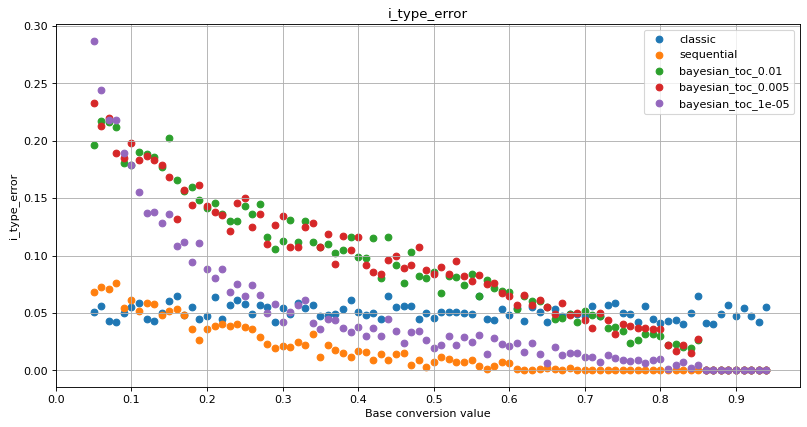

In [10]:
plot_metric(x='base_ctr', y='i_type_error', df=df_i_type_error)

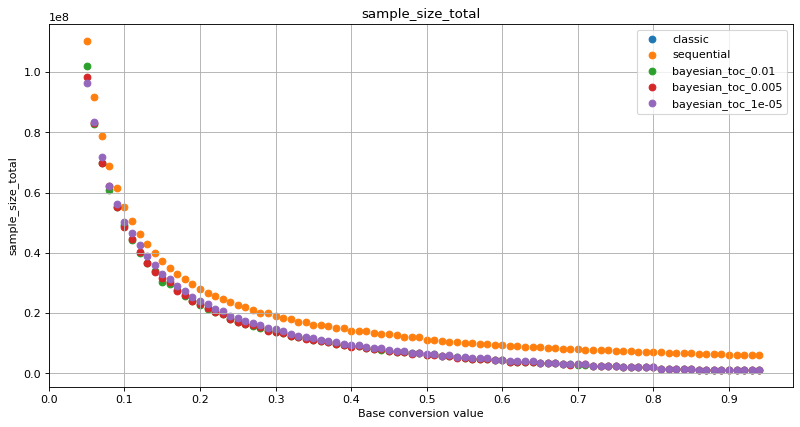

In [11]:
plot_metric(x='base_ctr',
            y='sample_size_total', 
            df=df_i_type_error[~df_i_type_error['ab_type'].isin(['classic'])])

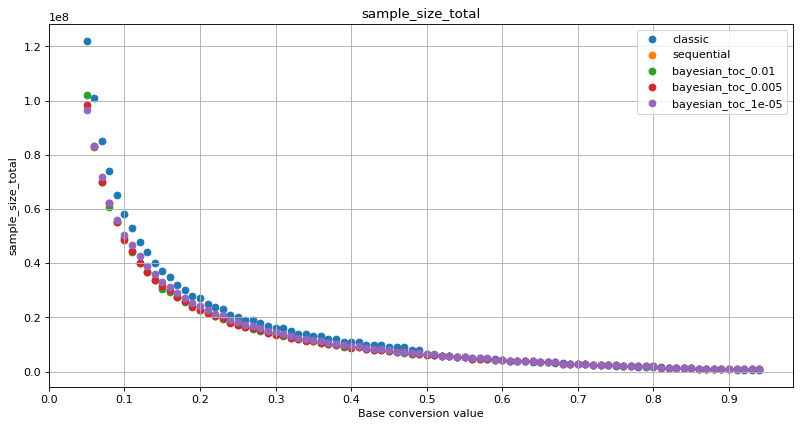

In [12]:
plot_metric(x='base_ctr',
            y='sample_size_total', 
            df=df_i_type_error[~df_i_type_error['ab_type'].isin(['sequential'])])

#### classic VS seqiential

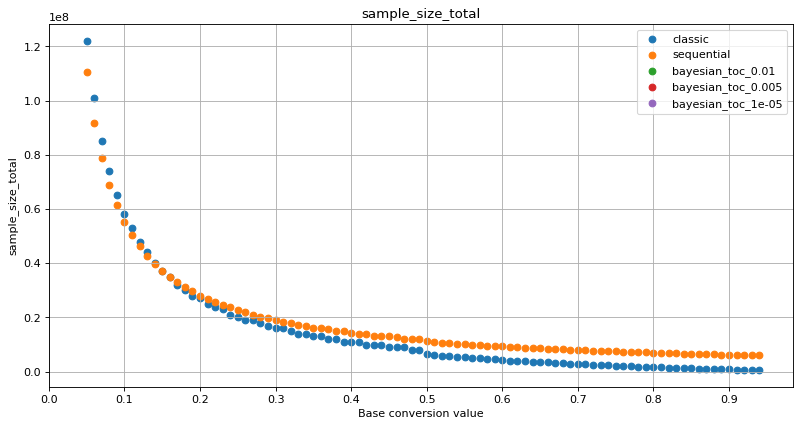

In [13]:
plot_metric(x='base_ctr',
            y='sample_size_total', 
            df=df_i_type_error[df_i_type_error['ab_type'].isin(['classic', 'sequential'])])

### II type error

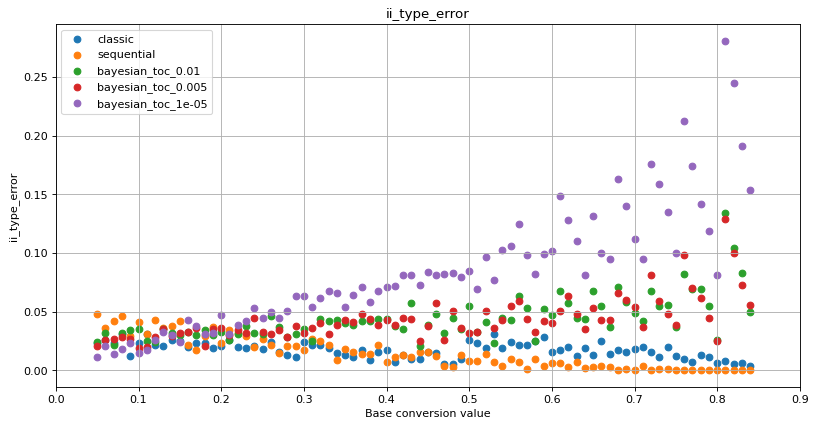

In [14]:
plot_metric(x='base_ctr',
            y='ii_type_error', 
            df=df_ii_type_error[df_ii_type_error['base_ctr_true_relative_diff']==0.07])

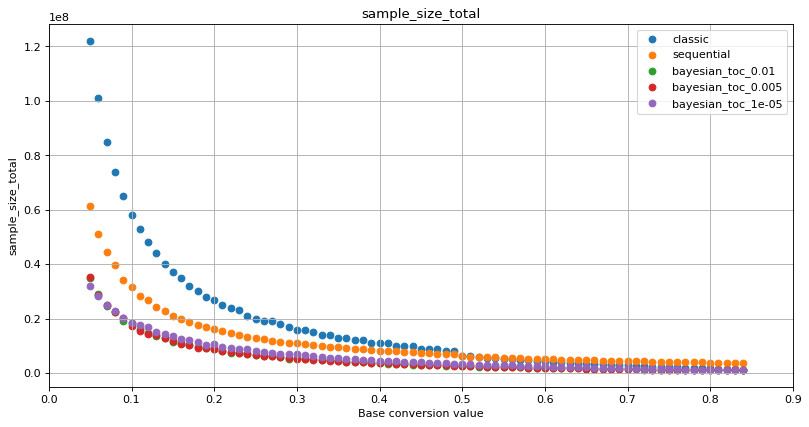

In [15]:
plot_metric(x='base_ctr',
            y='sample_size_total', 
            df=df_ii_type_error[df_ii_type_error['base_ctr_true_relative_diff']==0.07])

#### Classic VS Sequential

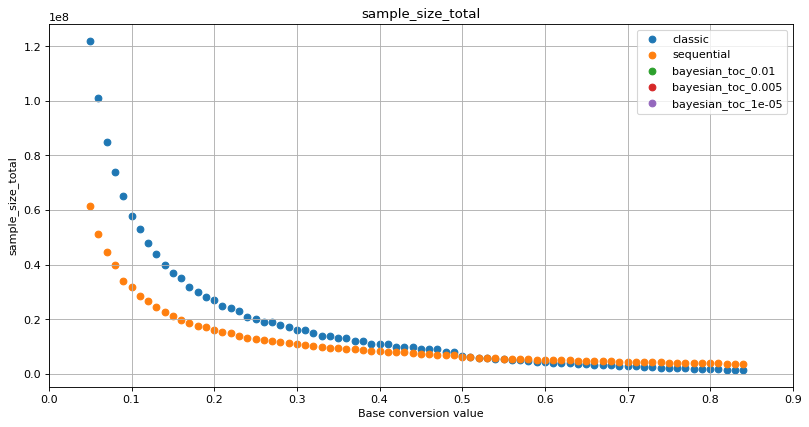

In [16]:
plot_metric(x='base_ctr',
            y='sample_size_total', 
            df=df_ii_type_error[(df_ii_type_error['ab_type'].isin(['classic', 'sequential'])) & \
                 (df_ii_type_error['base_ctr_true_relative_diff']==0.07)])

### Tables

In [17]:
classic_ = df_i_type_error[df_i_type_error['ab_type']=='classic'][['base_ctr',
                                                                   'i_type_error',
                                                                   'sample_size_total']]
sequential_ = df_i_type_error[df_i_type_error['ab_type']=='sequential'][['base_ctr',
                                                                   'i_type_error',
                                                                   'sample_size_total']]

bayesian_toc_0_01_ = df_i_type_error[(df_i_type_error['ab_type']=='bayesian') \
                                      & (df_i_type_error['toc']=='0.01')][['base_ctr',
                                                                   'i_type_error',
                                                                   'sample_size_total']]
bayesian_toc_0_005_ = df_i_type_error[(df_i_type_error['ab_type']=='bayesian') \
                                      & (df_i_type_error['toc']=='0.005')][['base_ctr',
                                                                   'i_type_error',
                                                                   'sample_size_total']]
bayesian_toc_0_1e05_ = df_i_type_error[(df_i_type_error['ab_type']=='bayesian') \
                                      & (df_i_type_error['toc']=='1e-05')][['base_ctr',
                                                                   'i_type_error',
                                                                   'sample_size_total']]

classic_.columns = ['base_ctr', 'classic_i_error', 'classic_size']
sequential_.columns = ['base_ctr', 'seq_i_error', 'seq_size']
bayesian_toc_0_01_.columns = ['base_ctr', 'bayesian_toc0.01_i_error', 'bayesian_toc0.01_size']
bayesian_toc_0_005_.columns = ['base_ctr', 'bayesian_toc0.005_i_error', 'bayesian_toc0.005_size']
bayesian_toc_0_1e05_.columns = ['base_ctr', 'bayesian_toc1e05_i_error', 'bayesian_toc1e05_size']

report = classic_

#report = pd.merge(report, classic_, on='base_ctr')
report = pd.merge(report, sequential_, on='base_ctr')
report = pd.merge(report, bayesian_toc_0_01_, on='base_ctr')
report = pd.merge(report, bayesian_toc_0_005_, on='base_ctr')
report = pd.merge(report, bayesian_toc_0_1e05_, on='base_ctr')

report['seq_i_size_diff_perc'] = report[['classic_size',
                                          'seq_size']].apply(lambda x: ((x[1]-x[0])/x[0])*100, 1)
report['bayesian_toc0.01_size_diff_perc'] = report[['classic_size',
                                          'bayesian_toc0.01_size']].apply(lambda x: ((x[1]-x[0])/x[0])*100, 1)
report['bayesian_toc0.005_size_diff_perc'] = report[['classic_size',
                                          'bayesian_toc0.005_size']].apply(lambda x: ((x[1]-x[0])/x[0])*100, 1)
report['bayesian_toc1e05_size_diff_perc'] = report[['classic_size',
                                          'bayesian_toc1e05_size']].apply(lambda x: ((x[1]-x[0])/x[0])*100, 1)

report[report['base_ctr']<0.85][['base_ctr', 
                                 'classic_i_error', 
                                 'seq_i_error',
                                 'bayesian_toc0.01_i_error',
                                 'bayesian_toc0.005_i_error',
                                 'bayesian_toc1e05_i_error',
                                 
       ]].to_csv("./reports/i_type_error_.csv", index=None)

report[report['base_ctr']<0.85][['base_ctr', 
                 'classic_size',
                 'seq_size',
                 'bayesian_toc0.01_size',
                 'bayesian_toc0.005_size',
                 'bayesian_toc1e05_size'

]].to_csv("./reports/i_type_error_size.csv", index=None)

#### Bayesian vs Classic total size diff

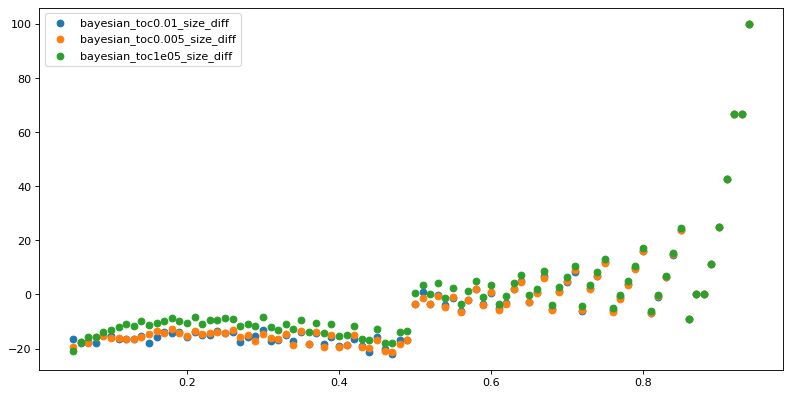

In [18]:
plt.figure(figsize=(12, 6), dpi=80)
#plt.scatter(x=report['base_ctr'],
#            y=report['seq_i_size_diff_perc'],
#            label = "sequential_size_diff_compare_class")
plt.scatter(x=report['base_ctr'],
            y=report['bayesian_toc0.01_size_diff_perc'],
            label = "bayesian_toc0.01_size_diff")
plt.scatter(x=report['base_ctr'],
            y=report['bayesian_toc0.005_size_diff_perc'],
            label = "bayesian_toc0.005_size_diff")
plt.scatter(x=report['base_ctr'],
            y=report['bayesian_toc1e05_size_diff_perc'],
            label = "bayesian_toc1e05_size_diff")
plt.legend()

### Sequential vs Classic size diff

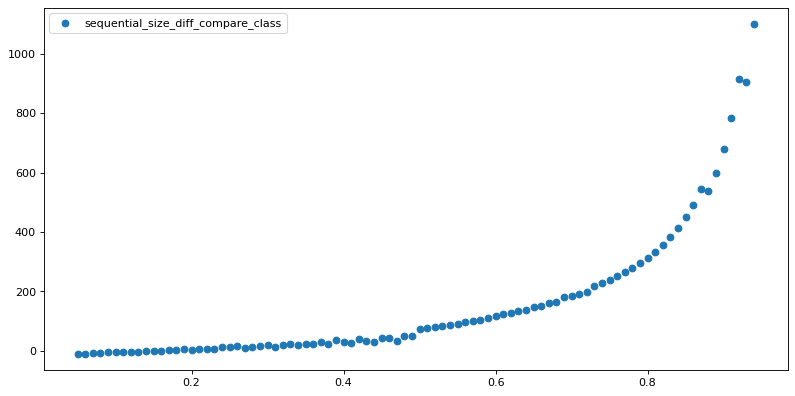

In [19]:
plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(x=report['base_ctr'],
            y=report['seq_i_size_diff_perc'],
            label = "sequential_size_diff_compare_class")
plt.legend()

### Выводы:

1. на конверсиях больше 0.5, sequential подход показывает себя хуже, чем классический (причем как в случае, когда победитель есть, так и когда конверсии одинаковые)
2. в случае, когда конверсии не отличаются (нет реального победителя), Байес требует меньше трафика чем Sequential при сопоставимых ошибках первого и второго рода
3. при больших значениях базовой конверсии (BASE_CTR>~0.5) Байес сопоставим по объему требуемого трафика с классическим выводом (но не лучше)
4. малые значения toc кажутся предпочтительнее (в районе 1e-05). Есть выигрыш по трафику и приемлемые ошибки первого и второго рода

### Second type error report

In [20]:
classic_ = df_ii_type_error[df_ii_type_error['ab_type']=='classic'][['base_ctr',
                                                                   'ii_type_error',
                                                                   'sample_size_total']]
sequential_ = df_ii_type_error[df_ii_type_error['ab_type']=='sequential'][['base_ctr',
                                                                   'ii_type_error',
                                                                   'sample_size_total']]

bayesian_toc_0_01_ = df_ii_type_error[(df_ii_type_error['ab_type']=='bayesian') \
                                      & (df_ii_type_error['toc']=='0.01')][['base_ctr',
                                                                   'ii_type_error',
                                                                   'sample_size_total']]
bayesian_toc_0_005_ = df_ii_type_error[(df_ii_type_error['ab_type']=='bayesian') \
                                      & (df_ii_type_error['toc']=='0.005')][['base_ctr',
                                                                   'ii_type_error',
                                                                   'sample_size_total']]
bayesian_toc_0_1e05_ = df_ii_type_error[(df_ii_type_error['ab_type']=='bayesian') \
                                      & (df_ii_type_error['toc']=='1e-05')][['base_ctr',
                                                                   'ii_type_error',
                                                                   'sample_size_total']]

classic_.columns = ['base_ctr', 'classic_ii_error', 'classic_size']
sequential_.columns = ['base_ctr', 'seq_ii_error', 'seq_size']
bayesian_toc_0_01_.columns = ['base_ctr', 'bayesian_toc0.01_ii_error', 'bayesian_toc0.01_size']
bayesian_toc_0_005_.columns = ['base_ctr', 'bayesian_toc0.005_ii_error', 'bayesian_toc0.005_size']
bayesian_toc_0_1e05_.columns = ['base_ctr', 'bayesian_toc1e05_ii_error', 'bayesian_toc1e05_size']

report = classic_

#report = pd.merge(report, classic_, on='base_ctr')
report = pd.merge(report, sequential_, on='base_ctr')
report = pd.merge(report, bayesian_toc_0_01_, on='base_ctr')
report = pd.merge(report, bayesian_toc_0_005_, on='base_ctr')
report = pd.merge(report, bayesian_toc_0_1e05_, on='base_ctr')

report['seq_i_size_diff_perc'] = report[['classic_size',
                                          'seq_size']].apply(lambda x: ((x[1]-x[0])/x[0])*100, 1)
report['bayesian_toc0.01_size_diff_perc'] = report[['classic_size',
                                          'bayesian_toc0.01_size']].apply(lambda x: ((x[1]-x[0])/x[0])*100, 1)
report['bayesian_toc0.005_size_diff_perc'] = report[['classic_size',
                                          'bayesian_toc0.005_size']].apply(lambda x: ((x[1]-x[0])/x[0])*100, 1)
report['bayesian_toc1e05_size_diff_perc'] = report[['classic_size',
                                          'bayesian_toc1e05_size']].apply(lambda x: ((x[1]-x[0])/x[0])*100, 1)

report[report['base_ctr']<0.85][['base_ctr', 
                                 'classic_ii_error', 
                                 'seq_ii_error',
                                 'bayesian_toc0.01_ii_error',
                                 'bayesian_toc0.005_ii_error',
                                 'bayesian_toc1e05_ii_error',
                                 
       ]].to_csv("./reports/ii_type_error_.csv", index=None)

report[report['base_ctr']<0.85][['base_ctr', 
                 'classic_size',
                 'seq_size',
                 'bayesian_toc0.01_size',
                 'bayesian_toc0.005_size',
                 'bayesian_toc1e05_size'

]].to_csv("./reports/ii_type_error_size.csv", index=None)

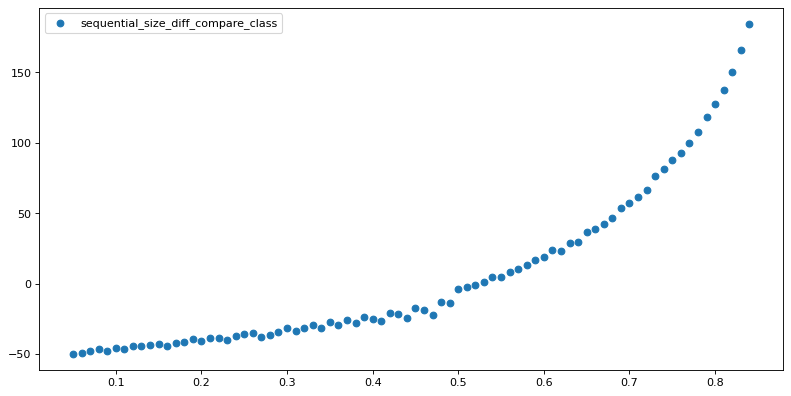

In [21]:
plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(x=report['base_ctr'],
            y=report['seq_i_size_diff_perc'],
            label = "sequential_size_diff_compare_class")
plt.legend()

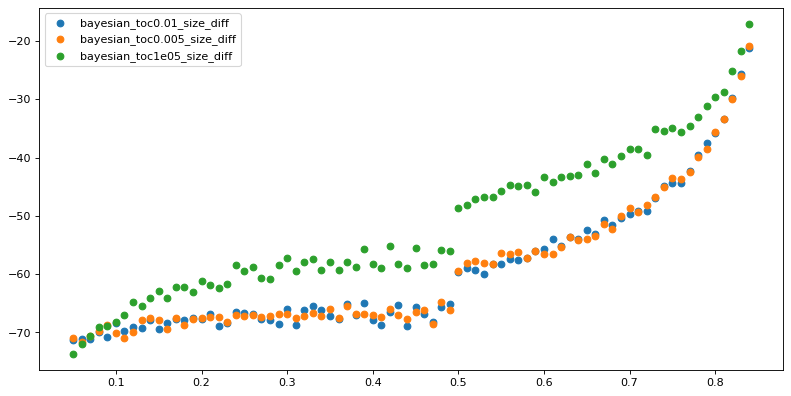

In [22]:
plt.figure(figsize=(12, 6), dpi=80)
#plt.scatter(x=report['base_ctr'],
#            y=report['seq_i_size_diff_perc'],
#            label = "sequential_size_diff_compare_class")
plt.scatter(x=report['base_ctr'],
            y=report['bayesian_toc0.01_size_diff_perc'],
            label = "bayesian_toc0.01_size_diff")
plt.scatter(x=report['base_ctr'],
            y=report['bayesian_toc0.005_size_diff_perc'],
            label = "bayesian_toc0.005_size_diff")
plt.scatter(x=report['base_ctr'],
            y=report['bayesian_toc1e05_size_diff_perc'],
            label = "bayesian_toc1e05_size_diff")
plt.legend()